##### BUILDING THE MODEL-BASED COLLABORATIVE FILTERING USING CLASSIFICATION ALGORITHMS TO PREDICT 
##### THE MISSING RATINGS IN THE HYPOTHETICAL DATA CONSIDERING 6 USERS AND 6 ITEMS.

In [1]:
#### IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
#### DEFINING THE HYPOTHETICAL DATA
df = pd.DataFrame([[2,3,1,4,2,3], [4,2, np.nan, 4,3,1], [np.nan, 3,3,1,2, np.nan], [1,3,2,3,2,4], [1, np.nan, 3,1,4,3],
                   [1,4,1,1, np.nan, 3]])
df

,0,1,2,3,4,5
0,2.0,3.0,1.0,4,2.0,3.0
1,4.0,2.0,NaN,4,3.0,1.0
2,NaN,3.0,3.0,1,2.0,NaN
3,1.0,3.0,2.0,3,2.0,4.0
4,1.0,NaN,3.0,1,4.0,3.0
5,1.0,4.0,1.0,1,NaN,3.0


In [3]:
#### FOR FITTING THE MODEL WE NEED ONLY THE COMPLETE ROWS (0th ROW AND 3rd ROW)
df_complete = df.dropna()
df_complete


,0,1,2,3,4,5
0,2.0,3.0,1.0,4,2.0,3.0
3,1.0,3.0,2.0,3,2.0,4.0


##### 1. FITTING AND PREDICTING THE DECISION TREE CLASSIFIER

In [4]:
### FOR BUILDING THE MODEL FOR ITEM 1, THAT IS, 0th COLUMN, THEREFORE WE CANCELS OUT 5th COLUMN IN THE TRAINING DATA AS IT HAS MISSING VALUE
X_1 = df_complete.iloc[:, 1:5]
y_1 = df_complete.iloc[:, 0]


The estimated rating for item 1 by user 3 is: 1.0
Hence, the system does not recommend this item 1 to user 3
|--- feature_2 <= 3.50
|   |--- class: 1.0
|--- feature_2 >  3.50
|   |--- class: 2.0



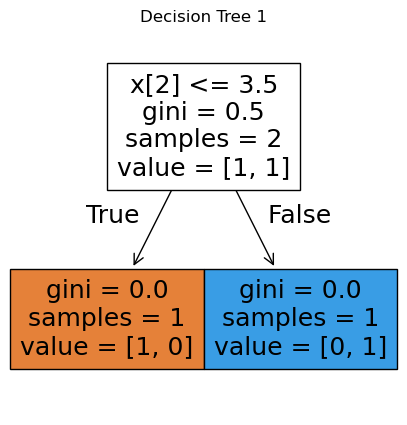

In [5]:
#### FITTING DECISION TREE FOR ITEM 1
clf_1 = DecisionTreeClassifier()
clf_1.fit(X_1, y_1)

#### INLINE PREDICTION OF r_hat(3,1) (ROW INDEX - 2, COLUMN INDEX - 0)
r_3_1 = clf_1.predict(np.array([[3,3,1,2]]))
print("The estimated rating for item 1 by user 3 is:", r_3_1[0])
print("Hence, the system does not recommend this item 1 to user 3")

#### PLOTTING THE DECISION TREE 
fig = plt.figure(figsize = (5,5))
clf_1_plot = plot_tree(clf_1, filled = True)
plt.title("Decision Tree 1")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(clf_1)
print(text_representation)

In [6]:
### FOR BUILDING THE MODEL FOR ITEM 2, THAT IS, 1st COLUMN
X_2 = df_complete.iloc[:, [0,2,3,4,5]]
y_2 = df_complete.iloc[:, 1]

The estimated rating for item 2 by user 5 is: 3.0
Hence, the system recommends this item 2 to user 5
|--- class: 0



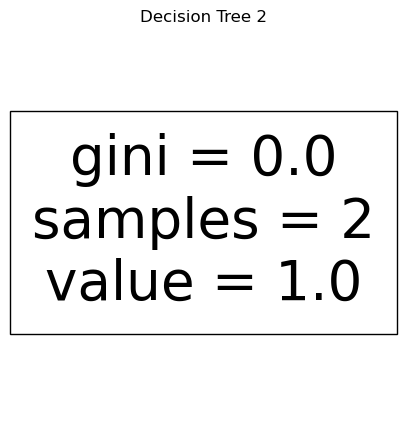

In [7]:
#### FITTING DECISION TREE FOR ITEM 2
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_2, y_2)

#### INLINE PREDICTION OF r_hat(5,2) (ROW INDEX - 4, COLUMN INDEX - 1)
r_5_2 = clf_2.predict(np.array([[1,3,1,4,3]]))
print("The estimated rating for item 2 by user 5 is:", r_5_2[0])
print("Hence, the system recommends this item 2 to user 5")

#### PLOTTING THE DECISION TREE 
fig = plt.figure(figsize = (5,5))
clf_2_plot = plot_tree(clf_2, filled = True)
plt.title("Decision Tree 2")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(clf_2)
print(text_representation)

In [8]:
### FOR BUILDING THE MODEL FOR ITEM 3, THAT IS, 2nd COLUMN
X_3 = df_complete.iloc[:, [0,1,3,4,5]]
y_3 = df_complete.iloc[:, 2]

The estimated rating for item 3 by user 2 is: 1.0
Hence, the system does not recommend this item 3 to user 2
|--- feature_4 <= 3.50
|   |--- class: 1.0
|--- feature_4 >  3.50
|   |--- class: 2.0



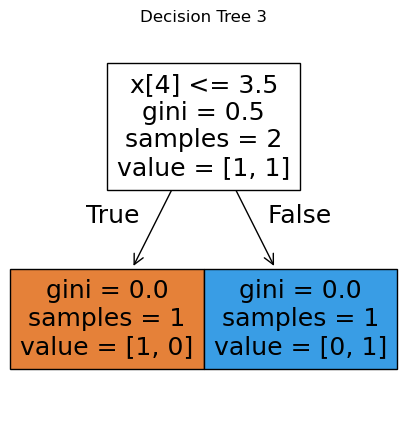

In [9]:
#### FITTING DECISION TREE FOR ITEM 3
clf_3 = DecisionTreeClassifier()
clf_3.fit(X_3, y_3)

#### INLINE PREDICTION OF r_hat(2,3) (ROW INDEX - 1, COLUMN INDEX - 2)
r_2_3 = clf_3.predict(np.array([[4,2,4,3,1]]))
print("The estimated rating for item 3 by user 2 is:", r_2_3[0])
print("Hence, the system does not recommend this item 3 to user 2")

#### PLOTTING THE DECISION TREE 
fig = plt.figure(figsize = (5,5))
clf_3_plot = plot_tree(clf_3, filled = True)
plt.title("Decision Tree 3")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(clf_3)
print(text_representation)

In [10]:
### FOR BUILDING THE MODEL FOR ITEM 4, THAT IS, 3rd COLUMN
X_4 = df_complete.iloc[:, [0,1,2,4,5]]
y_4 = df_complete.iloc[:, 3]

|--- feature_2 <= 1.50
|   |--- class: 4
|--- feature_2 >  1.50
|   |--- class: 3



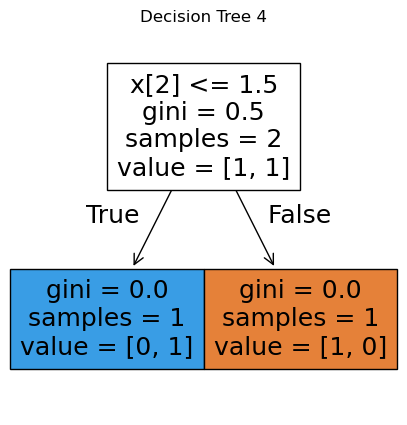

In [11]:
#### FITTING DECISION TREE FOR ITEM 4
clf_4 = DecisionTreeClassifier()
clf_4.fit(X_4, y_4)

#### PLOTTING THE DECISION TREE 
fig = plt.figure(figsize = (5,5))
clf_4_plot = plot_tree(clf_4, filled = True)
plt.title("Decision Tree 4")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(clf_4)
print(text_representation)


In [12]:
### FOR BUILDING THE MODEL FOR ITEM 5, THAT IS, 4th COLUMN
X_5 = df_complete.iloc[:, [0,1,2,3,5]]
y_5 = df_complete.iloc[:, 4]

The estimated rating for item 5 by user 6 is: 2.0
Hence, the system does not recommend this item 5 to user 6
|--- class: 0



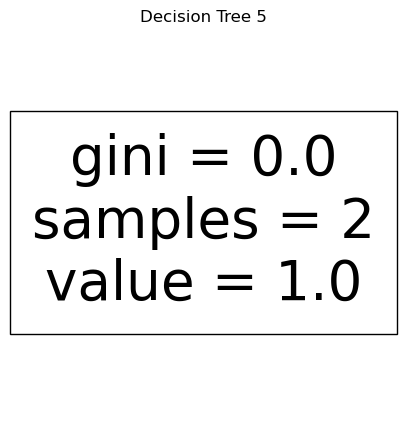

In [13]:
#### FITTING DECISION TREE FOR ITEM 5
clf_5 = DecisionTreeClassifier()
clf_5.fit(X_5, y_5)


#### INLINE PREDICTION OF r_hat(6,5) (ROW INDEX - 5, COLUMN INDEX - 4)
r_6_5 = clf_5.predict(np.array([[1,4,1,1,3]]))
print("The estimated rating for item 5 by user 6 is:", r_6_5[0])
print("Hence, the system does not recommend this item 5 to user 6")

#### PLOTTING THE DECISION TREE 
fig = plt.figure(figsize = (5,5))
clf_5_plot = plot_tree(clf_5, filled = True)
plt.title("Decision Tree 5")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(clf_5)
print(text_representation)


In [14]:
### FOR BUILDING THE MODEL FOR ITEM 6, THAT IS, 5th COLUMN
X_6 = df_complete.iloc[:, [1,2,3,4]]
y_6 = df_complete.iloc[:, 5]

The estimated rating for item 6 by user 3 is: 4.0
Hence, the system recommends this item 6 to user 3
|--- feature_1 <= 1.50
|   |--- class: 3.0
|--- feature_1 >  1.50
|   |--- class: 4.0



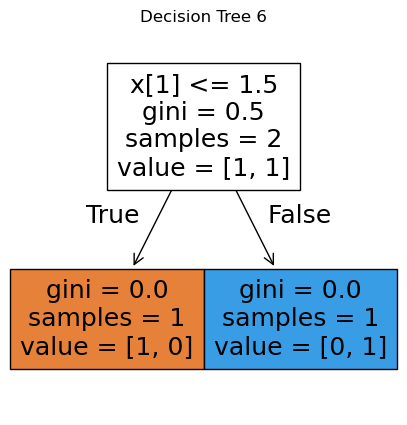

In [15]:
#### FITTING DECISION TREE FOR ITEM 6
clf_6 = DecisionTreeClassifier()
clf_6.fit(X_6, y_6)


#### INLINE PREDICTION OF r_hat(3,6) (ROW INDEX - 2, COLUMN INDEX - 5)
r_3_6 = clf_6.predict(np.array([[3,3,1,2]]))
print("The estimated rating for item 6 by user 3 is:", r_3_6[0])
print("Hence, the system recommends this item 6 to user 3")

#### PLOTTING THE DECISION TREE 
fig = plt.figure(figsize = (5,5))
clf_6_plot = plot_tree(clf_6, filled = True)
plt.title("Decision Tree 6")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(clf_6)
print(text_representation)


In [16]:
#### OUTLINE PREDICTION WITH TEST OBJECT
test_object = np.array([[2,3,1,4,3]])
test_pred = clf_3.predict(test_object)
print("The estimated rating for item 3 by the test user is:", test_pred[0])
print("The system does not recommend this item 3 to this test user")

The estimated rating for item 3 by the test user is: 1.0
The system does not recommend this item 3 to this test user


##### 2. FITTING AND PREDICTING THE NAIVE BAYES CLASSIFIER

In [17]:
#### FITTING NAIVE BAYES CLASSIFIER FOR ITEM 1
naive_1 = GaussianNB()
naive_1.fit(X_1, y_1)

#### INLINE PREDICTION OF r_hat(3,1) (ROW INDEX - 2, COLUMN INDEX - 0)
r_3_1 = naive_1.predict(np.array([[3,3,1,2]]))
print("The estimated rating for item 1 by user 3 is:", r_3_1[0])
print("Hence, the system does not recommend this item 1 to user 3")

The estimated rating for item 1 by user 3 is: 1.0
Hence, the system does not recommend this item 1 to user 3


In [18]:
#### FITTING NAIVE BAYES CLASSIFIER FOR ITEM 2
naive_2 = GaussianNB()
naive_2.fit(X_2, y_2)

#### INLINE PREDICTION OF r_hat(5,2) (ROW INDEX - 4, COLUMN INDEX - 1)
r_5_2 = naive_2.predict(np.array([[1,3,1,4,3]]))
print("The estimated rating for item 2 by user 5 is:", r_5_2[0])
print("Hence, the system recommends this item 2 to user 5")

The estimated rating for item 2 by user 5 is: 3.0
Hence, the system recommends this item 2 to user 5


In [19]:
#### FITTING NAIVE BAYES CLASSIFIER FOR ITEM 3
naive_3 = DecisionTreeClassifier()
naive_3.fit(X_3, y_3)

#### INLINE PREDICTION OF r_hat(2,3) (ROW INDEX - 1, COLUMN INDEX - 2)
r_2_3 = naive_3.predict(np.array([[4,2,4,3,1]]))
print("The estimated rating for item 3 by user 2 is:", r_2_3[0])
print("Hence, the system does not recommend this item 3 to user 2")

The estimated rating for item 3 by user 2 is: 1.0
Hence, the system does not recommend this item 3 to user 2


In [20]:
#### FITTING NAIVE BAYES CLASSIFIER FOR ITEM 4
naive_4 = GaussianNB()
naive_4.fit(X_4, y_4)

GaussianNB()

In [21]:
#### FITTING NAIVE BAYES CLASSIFIER FOR ITEM 5
naive_5 = DecisionTreeClassifier()
naive_5.fit(X_5, y_5)

#### INLINE PREDICTION OF r_hat(6,5) (ROW INDEX - 5, COLUMN INDEX - 4)
r_6_5 = naive_5.predict(np.array([[1,4,1,1,3]]))
print("The estimated rating for item 5 by user 6 is:", r_6_5[0])
print("Hence, the system does not recommend this item 5 to user 6")

The estimated rating for item 5 by user 6 is: 2.0
Hence, the system does not recommend this item 5 to user 6


In [22]:
#### FITTING NAIVE BAYES CLASSIFIER FOR ITEM 6
naive_6 = GaussianNB()
naive_6.fit(X_6, y_6)


#### INLINE PREDICTION OF r_hat(3,6) (ROW INDEX - 2, COLUMN INDEX - 5)
r_3_6 = naive_6.predict(np.array([[3,3,1,2]]))
print("The estimated rating for item 6 by user 3 is:", r_3_6[0])
print("Hence, the system recommends this item 6 to user 3")

The estimated rating for item 6 by user 3 is: 4.0
Hence, the system recommends this item 6 to user 3


In [23]:
#### OUTLINE PREDICTION
test_object = np.array([[3,4,2,1,4]])
test_pred = naive_4.predict(test_object)
print("The estimated rating for item 4 by the test user is:", test_pred[0])
print("The system recommends this item 4 to this test user")

The estimated rating for item 4 by the test user is: 4
The system recommends this item 4 to this test user


##### 3. DECISION TREE EVALUATION

In [24]:
#### INLINE PREDICTIONS
y_1_pred = clf_1.predict(X_1)
y_2_pred = clf_2.predict(X_2)
y_3_pred = clf_3.predict(X_3)
y_4_pred = clf_4.predict(X_4)
y_5_pred = clf_5.predict(X_5)
y_6_pred = clf_6.predict(X_6)

#### EVALUATING THE MODEL PERFORMANCES
accuracy_1 = accuracy_score(y_1, y_1_pred)
accuracy_2 = accuracy_score(y_2, y_2_pred)
accuracy_3 = accuracy_score(y_3, y_3_pred)
accuracy_4 = accuracy_score(y_4, y_4_pred)
accuracy_5 = accuracy_score(y_5, y_5_pred)
accuracy_6 = accuracy_score(y_6, y_6_pred)

print("Its a good built model:", accuracy_1)
print("Its a good built model:", accuracy_2)
print("Its a good built model:", accuracy_3)
print("Its a good built model:", accuracy_4)
print("Its a good built model:", accuracy_5)
print("Its a good built model:", accuracy_6)

Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0


##### 4. NAIVE BAYES CLASSIFIER EVALUATION

In [25]:
#### INLINE PREDICTIONS
y_1_pred = naive_1.predict(X_1)
y_2_pred = naive_2.predict(X_2)
y_3_pred = naive_3.predict(X_3)
y_4_pred = naive_4.predict(X_4)
y_5_pred = naive_5.predict(X_5)
y_6_pred = naive_6.predict(X_6)

#### EVALUATING THE MODEL PERFORMANCES
accuracy_1 = accuracy_score(y_1, y_1_pred)
accuracy_2 = accuracy_score(y_2, y_2_pred)
accuracy_3 = accuracy_score(y_3, y_3_pred)
accuracy_4 = accuracy_score(y_4, y_4_pred)
accuracy_5 = accuracy_score(y_5, y_5_pred)
accuracy_6 = accuracy_score(y_6, y_6_pred)

print("Its a good built model:", accuracy_1)
print("Its a good built model:", accuracy_2)
print("Its a good built model:", accuracy_3)
print("Its a good built model:", accuracy_4)
print("Its a good built model:", accuracy_5)
print("Its a good built model:", accuracy_6)

Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0
Its a good built model: 1.0
